# Simple Neural Network Models

Input: single principal component based on all 15 indicators + returns

Output: optimal max-shape portfolio with tight restrictions for the next period

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, Dropout, GRU, LSTM, Bidirectional, Input
from keras.regularizers import L2
from keras.utils import plot_model

In [ ]:
import os
os.chdir(os.path.expanduser('../'))

from helper_functions import train_and_evaluate_model, run_full_backtesting

In [2]:
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider

In [3]:
data_provider = DataProvider()
x = data_provider.get_formatted_features()
y = data_provider.get_formatted_targets()
x_train, y_train, x_val, y_val, x_test, y_test = data_provider.train_train_split(x, y)

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


## Simple Dense Neural Network Model

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.8472 - val_loss: 5.3578
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2081 - val_loss: 4.7594
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6227 - val_loss: 4.2154
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0919 - val_loss: 3.7245
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6133 - val_loss: 3.2839
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1845 - val_loss: 2.8901
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8016 - val_loss: 2.5392
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4605 - val_loss: 2.2272
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1575 - val_loss: 1.9505
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8884 - val_loss: 1.7052
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6503 - val_loss: 1.4883
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4398 - val_loss: 1.2967

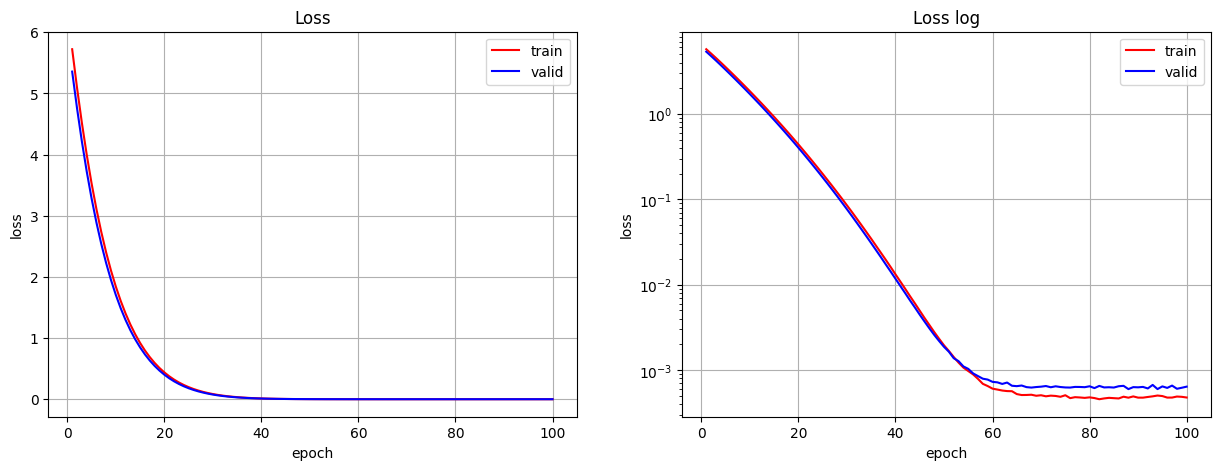

In [13]:
model_dnn = Sequential((
    Flatten(input_shape=x_train.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.2)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn, x_train, y_train,
                         x_val, y_val, x_test, y_test,
                         epochs=100)

Checking sample results

In [14]:
predictions = model_dnn.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [15]:
predictions[0].round(3)

array([0.462, 0.081, 0.088, 0.031, 0.029, 0.032, 0.028, 0.023, 0.013,
       0.011, 0.012, 0.012, 0.017, 0.012, 0.017, 0.008, 0.009, 0.009,
       0.017, 0.01 , 0.01 , 0.013, 0.013, 0.008, 0.009, 0.015, 0.01 ],
      dtype=float32)

In [16]:
y_test[0]

array([0.576, 0.046, 0.075, 0.023, 0.02 , 0.039, 0.017, 0.016, 0.007,
       0.008, 0.02 , 0.005, 0.02 , 0.02 , 0.004, 0.002, 0.002, 0.002,
       0.024, 0.025, 0.02 , 0.012, 0.006, 0.003, 0.004, 0.002, 0.002])

## Convolutional Neural Network Model

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convolutional1D (Conv1D)        │ (None, 4, 32)          │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,147 (20.11 KB)

 Trainable params: 5,147 (20.11 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.8350 - val_loss: 2.6170
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5519 - val_loss: 2.3520
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2918 - val_loss: 2.1093
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0541 - val_loss: 1.8880
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8374 - val_loss: 1.6872
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6407 - val_loss: 1.5054
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4637 - val_loss: 1.3412
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3036 - val_loss: 1.1931
Epoch 9/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1591 - val_loss: 1.0596
Epoch 10/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0294 - val_loss: 0.9394
Epoch 11/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9131 - val_loss: 0.8317
Epoch 12/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8090 - val_loss: 0.7356

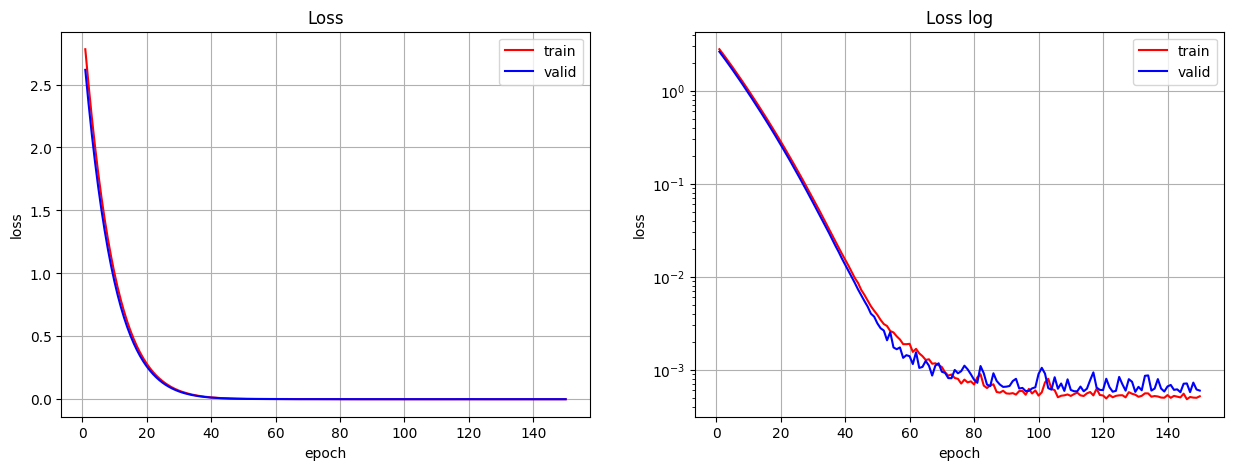

In [39]:
model_cnn = Sequential((
    Conv1D(32, 3, input_shape=x_train.shape[1:], name='Convolutional1D'),
    Flatten(name='Flatten'),
    Dropout(0.4, name='Dropout'),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1), name='Dense'),
    Dense(y_train.shape[1], activation='softmax', name='Output')
))

train_and_evaluate_model(model_cnn, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=150)

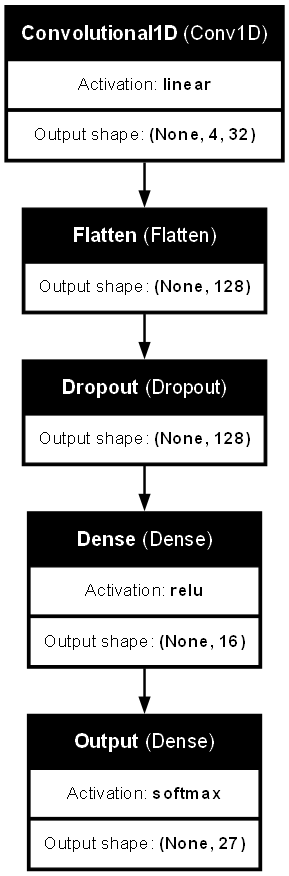

In [35]:
plot_model(model_cnn, show_shapes=True, show_layer_names=True, show_layer_activations=True, dpi=90)

## Model with GRU

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ GRU (GRU)                       │ (None, 32)             │         5,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,843 (26.73 KB)

 Trainable params: 6,843 (26.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 4.3886 - val_loss: 4.1970
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1352 - val_loss: 3.9517
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8925 - val_loss: 3.7178
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6616 - val_loss: 3.4951
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4420 - val_loss: 3.2837
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2337 - val_loss: 3.0835
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0366 - val_loss: 2.8942
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8505 - val_loss: 2.7158
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6752 - val_loss: 2.5480
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5102 - val_loss: 2.3899
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3541 - val_loss: 2.2410
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2072 - val_loss: 2.1007

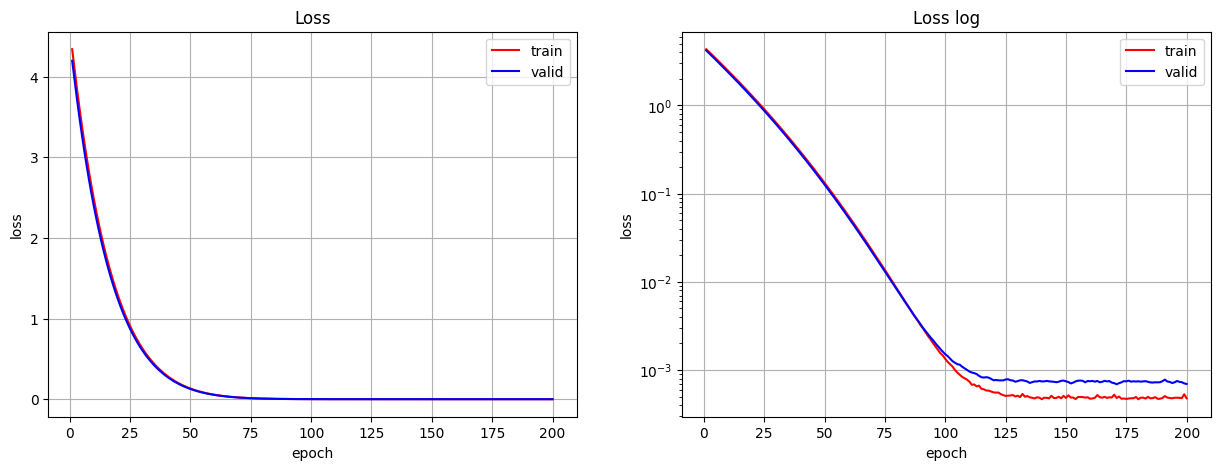

In [41]:
dropout = 0.1

model_gru = Sequential((
    GRU(32, input_shape=x_train.shape[1:],
         dropout=dropout, recurrent_dropout=dropout, name='GRU'),
    Dense(16, activation='relu', kernel_regularizer=L2(0.2), name='Dense'),
    Dense(y_train.shape[1], activation='softmax', name='Output')
))

train_and_evaluate_model(model_gru, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=200)

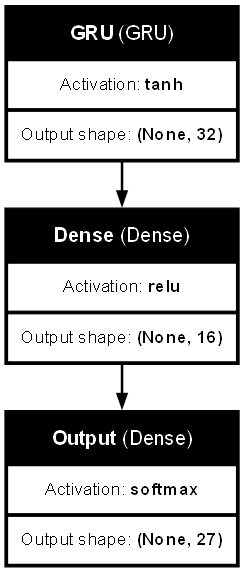

In [44]:
plot_model(model_gru, show_shapes=True, show_layer_names=True, show_layer_activations=True, dpi=90)

## Model with LSTM

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,667 (33.86 KB)

 Trainable params: 8,667 (33.86 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.2631 - val_loss: 4.0763
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0161 - val_loss: 3.8377
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7803 - val_loss: 3.6105
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5560 - val_loss: 3.3946
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3431 - val_loss: 3.1901
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1416 - val_loss: 2.9966
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9508 - val_loss: 2.8138
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7710 - val_loss: 2.6411
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6009 - val_loss: 2.4780
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4404 - val_loss: 2.3242
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2893 - val_loss: 2.1795
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1468 - val_loss: 2.0434

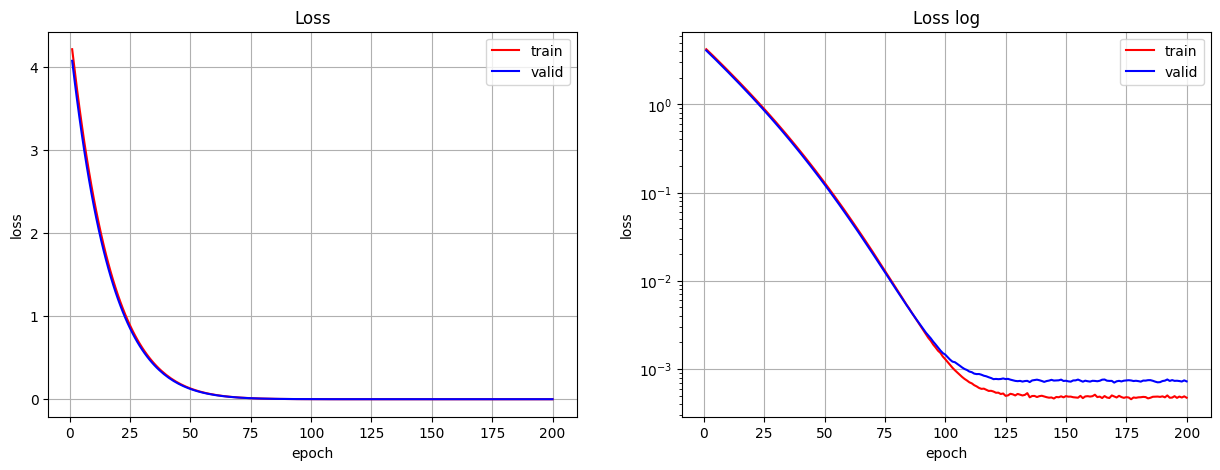

In [10]:
dropout = 0.1

model_lstm = Sequential((
    LSTM(32, input_shape=x_train.shape[1:],
         dropout=dropout, recurrent_dropout=dropout),
    Dense(16, activation='relu', kernel_regularizer=L2(0.2)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_lstm, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=200)

## Model Bidireccional

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 6, 32)          │         4,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         3,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,867 (30.73 KB)

 Trainable params: 7,867 (30.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.7789 - val_loss: 5.2515
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0921 - val_loss: 4.6131
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4690 - val_loss: 4.0380
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9089 - val_loss: 3.5240
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4099 - val_loss: 3.0674
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9671 - val_loss: 2.6643
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5767 - val_loss: 2.3100
Epoch 8/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2332 - val_loss: 1.9992
Epoch 9/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9317 - val_loss: 1.7268
Epoch 10/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6679 - val_loss: 1.4884
Epoch 11/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4372 - val_loss: 1.2804
Epoch 12/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2357 - val_loss: 1.0992

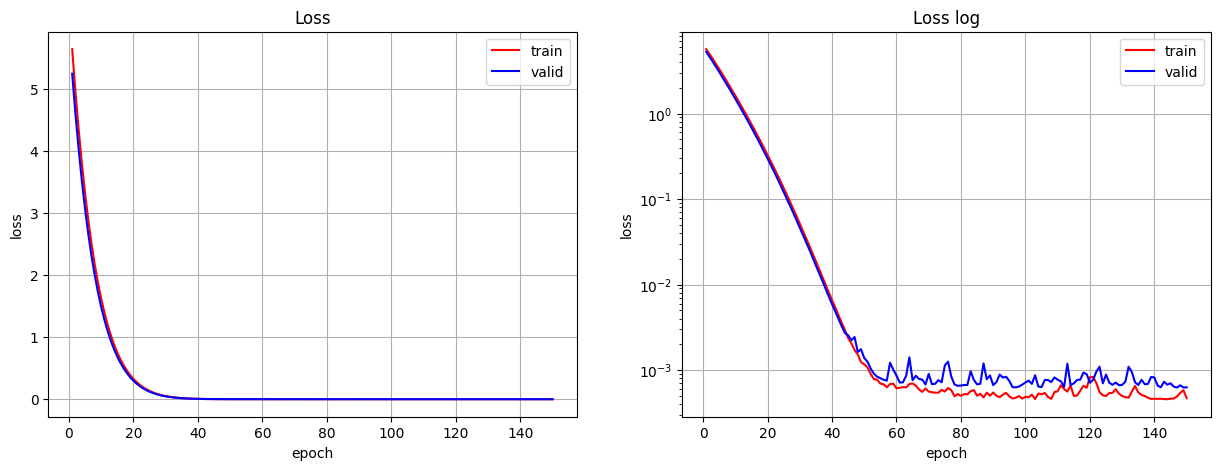

In [11]:
forward_layer = GRU(16, activation='relu',
                    return_sequences=True)
backward_layer = GRU(16, activation='relu',
                     return_sequences=True,
                     go_backwards=True)

model_bidirectional = Sequential((
    Bidirectional(layer=forward_layer,
                  backward_layer=backward_layer,
                  input_shape=x_train.shape[1:]),
    Flatten(),
    Dense(16, activation='relu', kernel_regularizer=L2(0.2)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_bidirectional, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=150)

## Backtesting

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


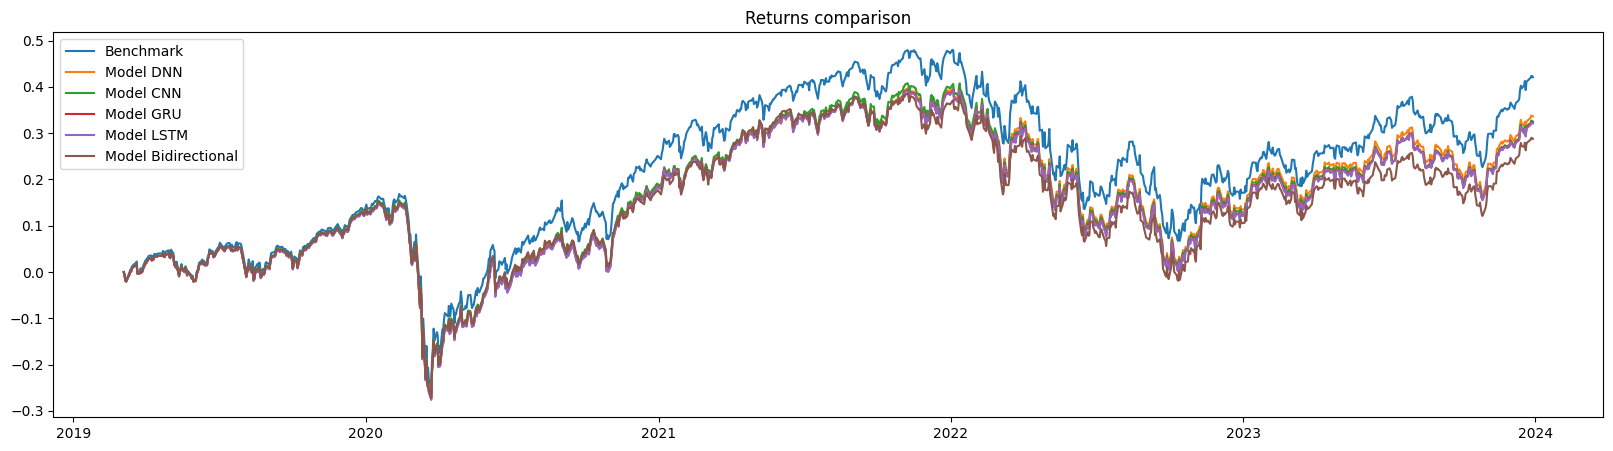

,Annual Returns,Annual Volatility,Sharpe Ratio,Sortino Ratio,Max Drawdown,Max Time Under Water,Calmar Ratio,Information Ratio
Benchmark,0.076754,0.203326,0.377494,0.442047,-0.354829,500.0,0.216313,0
Model DNN,0.062654,0.201348,0.311172,0.360051,-0.367717,499.0,0.170386,-0.535518
Model CNN,0.060818,0.201463,0.30188,0.349188,-0.367699,538.0,0.165401,-0.591236
Model GRU,0.060354,0.201951,0.298853,0.345585,-0.369518,493.0,0.163331,-0.596672
Model LSTM,0.06014,0.20196,0.297781,0.344199,-0.369985,493.0,0.162547,-0.597213
Model Bidirectional,0.054508,0.201857,0.270035,0.313317,-0.368443,538.0,0.147942,-0.65129


In [40]:
models = {
    'Model DNN': (model_dnn, x_test),
    'Model CNN': (model_cnn, x_test),
    'Model GRU': (model_gru, x_test),
    'Model LSTM': (model_lstm, x_test),
    'Model Bidirectional': (model_bidirectional, x_test)
}

df_results = run_full_backtesting(data_provider, models)
df_results